## Artificial Neural Network

The idea of perceptron developed by Frank Rosenblatt in 1958. Biologically neurons accept some sort of input signal and then nucleus does some sort of calculations (something happens in the nucleus of this neuron) and then it outputs as a signal in Axon. How can we express this simplified biological model in a mathematical way?

<img src="fig/NN.png" width="500">
Source of the figure: Akgün+18

Input layer ----> Hidden layers ----> Output layer

Activation is a function that acts on the weighted combination of the inputs plus bias. There is a wide variety of activation functions.

<img src="fig/activation.png" width="500">
Source of the figure: Hughes+16

Multi-Class problems: 1) Non-Exclusive Classes 2) Mutually Exclusive Classes

For Non-Exclusive classes, we can use Sigmoid activation function.  

$$\phi(z)=\frac{1}{1+e^{-z}}$$

For Mutually Exclusive Classes, we can use softmax activation function.

$$\phi(z)=\frac{e^{z_i}}{\sum e^{z_i}}$$

To train the neural net, we need to define a cost function and optimize it. There are different optimizing algorithms. For more info about  gradient descent algorithms see [this paper](https://arxiv.org/pdf/1609.04747.pdf). In most of the cases, Adaptive Moment Estimation (Adam) optimizer is a good choice.

For regression problems, we usually use mean squared error (MSE) loss (cost) function.   
For classification problems, we usually use cross entropy loss function.

In the lecture you learned about  backpropagation algorithm which is used to train a neural network. So, let's jump into the implementation of a feedforward neural network using Keras. Keras is a high level API built on TensorFlow. 

We are given a pseudo dataset which has 7 inputs and 3 outputs. We will build a simple NN model to solve this regression problem. First let's get the data:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
Data=pd.read_csv('Data.csv')
Data.head()

,I1,I2,I3,I4,I5,I6,I7,O1,O2,O3
0,2.402260,2.631375,2.620065,2.741343,2.855368,3.369216,3.565848,2.763428,3.214844,3.262451
1,2.262583,2.384253,2.413262,2.704121,2.807388,3.053078,3.041393,2.812913,2.602060,2.698970
2,2.295275,2.413758,2.355623,2.336109,2.601325,2.748188,2.653213,2.477121,2.690196,2.806180
3,2.352647,2.419292,2.590186,2.835756,2.943433,2.770852,2.556303,2.518514,2.716003,2.934498
4,3.006206,3.247684,3.253961,3.220793,3.286278,3.133539,2.875061,3.230449,3.173186,3.225309


Do we have any missing data?

In [8]:
Data.isnull().sum()

I1    0
I2    0
I3    0
I4    0
I5    0
I6    0
I7    0
O1    0
O2    0
O3    0
dtype: int64

In [9]:
X=Data[['I1','I2','I3','I4','I5','I6','I7']]
y=Data[['O1','O2','O3']]

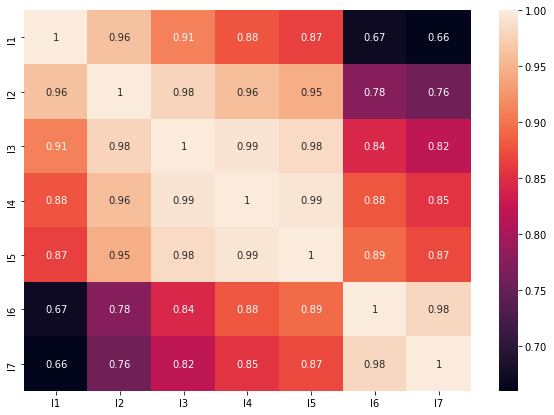

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)
plt.show()

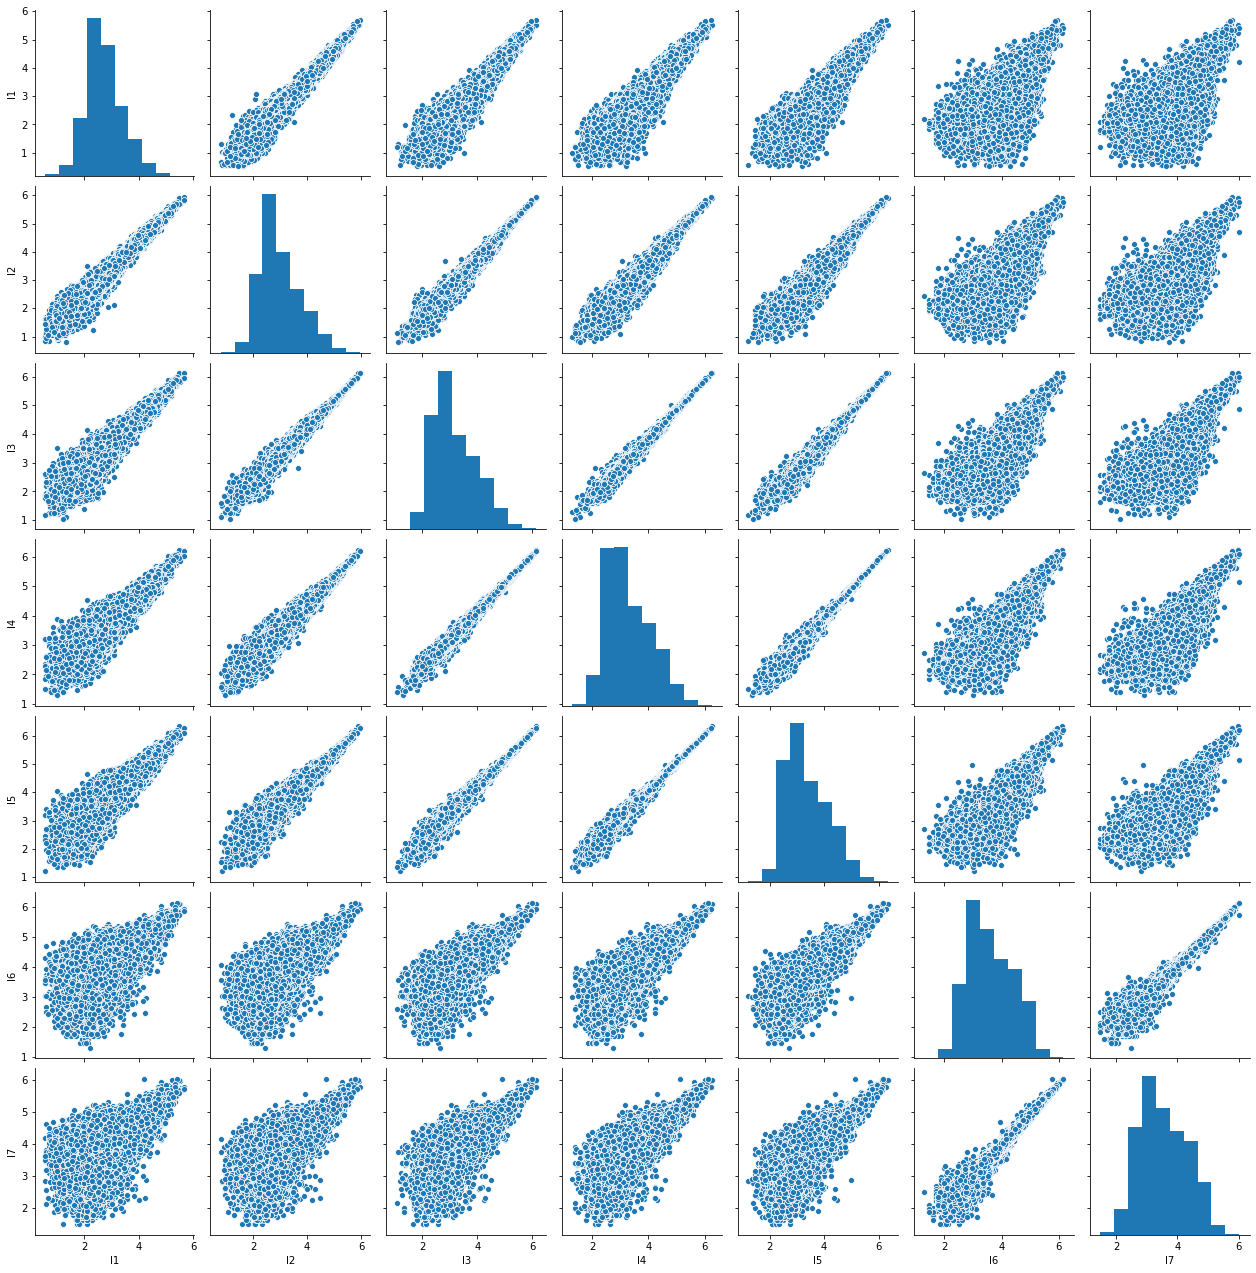

In [13]:
sns.pairplot(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3,random_state=100)

We should scale our data considering the distribution of each input

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
model=Sequential()

model.add(Dense(7,activation='linear'))

model.add(Dense(10,activation='linear'))
model.add(Dense(10,activation='linear'))

model.add(Dense(3))

model.compile(optimizer='adam',loss='mean_absolute_error')

In [26]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=20)

Epoch 1/20
950/950 [==============================] - 1s 1ms/step - loss: 0.2491 - val_loss: 0.1078
Epoch 2/20
950/950 [==============================] - 1s 1ms/step - loss: 0.1016 - val_loss: 0.1024
Epoch 3/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0997 - val_loss: 0.0981
Epoch 4/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0985 - val_loss: 0.0986
Epoch 5/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0979 - val_loss: 0.1033
Epoch 6/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0975 - val_loss: 0.0965
Epoch 7/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0969 - val_loss: 0.0963
Epoch 8/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0970 - val_loss: 0.0988
Epoch 9/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0968 - val_loss: 0.0984
Epoch 10/20
950/950 [==============================] - 1s 1ms/step - loss: 0.0962 - val_loss: 0.0954

In [29]:
loss=pd.DataFrame(model.history.history)

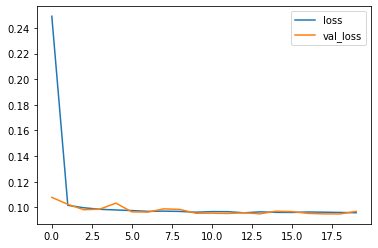

In [30]:
loss.plot()

In [31]:
predictions=model.predict(X_test)

Text(0, 0.5, 'O3_prediction')

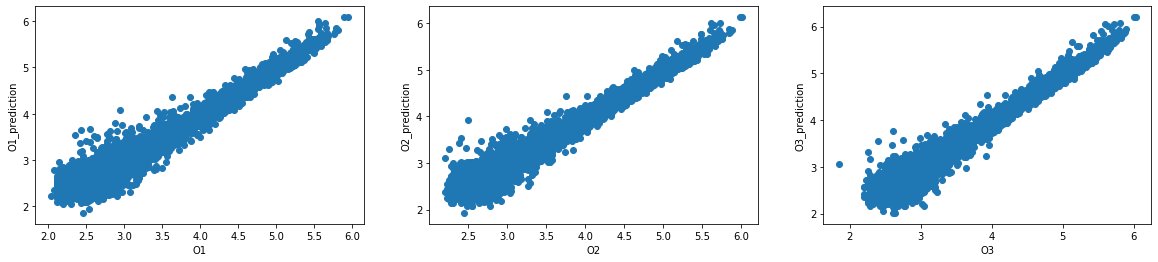

In [34]:
fig,ax=plt.subplots(1,3,figsize=(20,4))

ax[0].scatter(y_test.T[0],predictions.T[0])
ax[0].set_xlabel('O1')
ax[0].set_ylabel('O1_prediction')

ax[1].scatter(y_test.T[1],predictions.T[1])
ax[1].set_xlabel('O2')
ax[1].set_ylabel('O2_prediction')

ax[2].scatter(y_test.T[2],predictions.T[2])
ax[2].set_xlabel('O3')
ax[2].set_ylabel('O3_prediction')
